<a href="https://colab.research.google.com/github/arti1117/hg-mldl/blob/main/03_1_KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

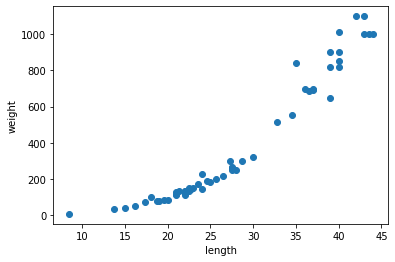

In [3]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [5]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [6]:
test_array2 = test_array.reshape(2, 2)
print(test_array2.shape)
test_array2

(2, 2)


array([[1, 2],
       [3, 4]])

In [7]:
test_array3 = test_array.reshape(2,3)

ValueError: ignored

In [8]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [9]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

In [10]:
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [11]:
print(knr.score(test_input, test_target))

0.992809406101064


In [12]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듦
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [13]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [14]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 재훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [15]:
print(knr.score(test_input, test_target))

0.9746459963987609


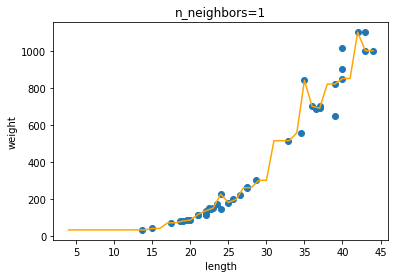

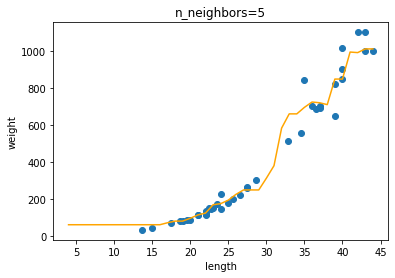

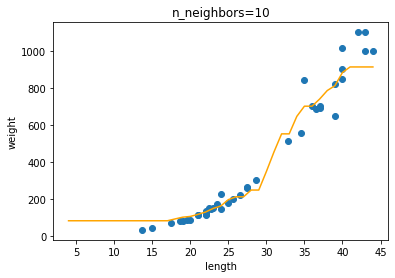

In [23]:
# k-최근접 이웃 회귀 객체를 만듦
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표를 만듦
x = np.arange(4, 45).reshape(-1, 1)

# fig, axes = plt.subplots(3)

# # n = 1, 5, 10일 때 예측 결과를 그래프로 그림
# for i, n in enumerate([1, 5, 10]):
#   # 모델을 훈련
#   knr.n_neighbors = n
#   knr.fit(train_input, train_target)

#   # 지정한 범위 x에 대한 예측을 구함
#   prediction = knr.score(test_input, test_target)

#   # 훈련 세트와 예측 결과를 그래프로 그림
#   axes[i].scatter(train_input, train_target)
#   axes[i].plot(x, prediction)

# plt.show()

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction, color='Orange')
  plt.title('n_neighbors={}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()